----
# Kolokwium 1
----

In [1]:
%matplotlib inline
import sympy
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12, 8)

----
## Zadanie 0
----
Proszę przypisać wartości zmiennych
- imie_i_nazwisko,
- numer_indeksu,
- numer_grupy_lab,


oraz obliczyć wartość zmiennej *N*

In [2]:
imie_i_nazwisko = "Maciej Glowacki"
numer_indeksu = 156909
numer_grupy_lab = 1

N = numer_indeksu % 6
print(f'Twoja liczba N to {N}')

Twoja liczba N to 3


----
## Zadanie 1. Charakterystyki układów
----
Proszę wyznaczyć i wykreślić charakterystyki amplitudową oraz fazową układu o podanej transmitacji.

Porszę wyznaczyć i wykreślić odpowiedź impulsową tego układu.

Proszę pamiętać o odpowiednim opisie osi na wykresach.

$$ H(s) = {{(N+1)s + 1} \over {2s^2 + s + N+5}} $$



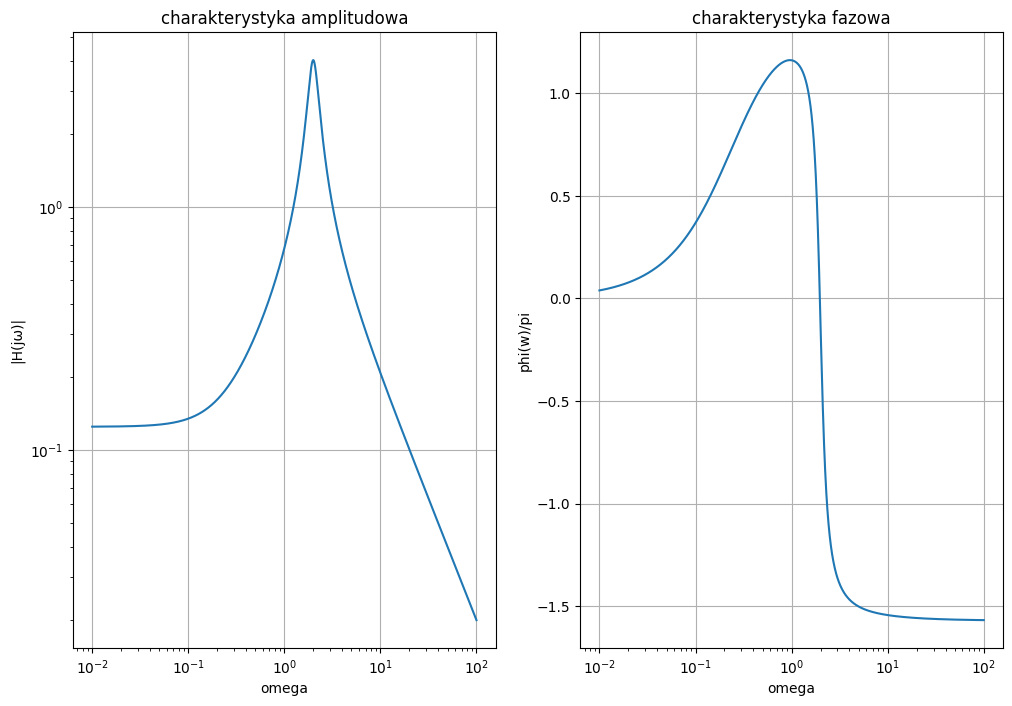

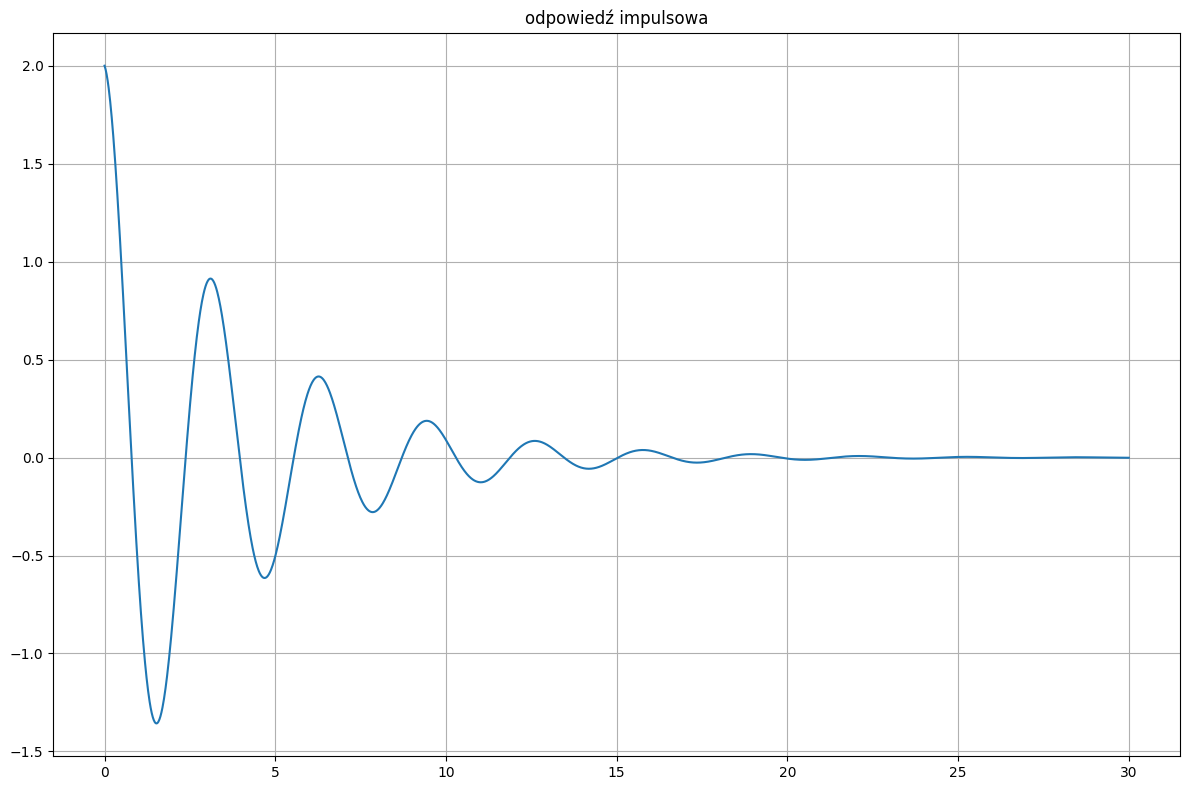

In [9]:
#deklaracja wartości s oraz podanej Transmitacji
ω = sympy.Symbol('ω', real = True)

s = 0 + sympy.I*ω

H = ((N + 1)*s + 1)/(2*s**2 + s + N + 5)


# Charakteryka amplitudaowa i fazowa
re =  sympy.re(H)
im = sympy.im(H)

modul =  sympy.sqrt(re**2 + im**2)
faza = sympy.atan(im/re)

#wykres charakterstki amplitudowaej i fazowej

w = np.logspace(-2, 2, 10000)
Mod = sympy.lambdify(ω, modul, 'numpy')(w)
P = sympy.lambdify(ω, faza, 'numpy')(w)

fig,axs=plt.subplots(1,2)
axs[0].loglog(w,Mod)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("omega")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()

axs[1].semilogx(w,P)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("omega")
axs[1].set_ylabel("phi(w)/pi")
axs[1].grid()

#Odpowiedz impulsowa

A = np.poly1d([N + 1, 1])
B = np.poly1d([2, 1, N + 5])

def calculateImpulseResponseFromNumDen(A, B, TimeDomain):
    step = scipy.signal.impulse(scipy.signal.tf2ss(B, A), T=TimeDomain)[1]
    return step

time = np.linspace(0, 30, 2000)
impulse = calculateImpulseResponseFromNumDen(B, A, time)

figI, axI = plt.subplots(1, 1)
axI.plot(time, impulse)
axI.set_title("odpowiedź impulsowa")
axI.grid()
figI.tight_layout()  

----
## Zadanie 2. Stabilność i minimalnofazowość
----
Proszę określić, czy układ o podanej transmitancji jest stabilny w sensie BIBO i minimalnofazowy

$$ H(s)={{s^6+5s^5+7s^4+2Ns^3+s^2+2} \over {s^2+(0,5N+1)s+3}} $$

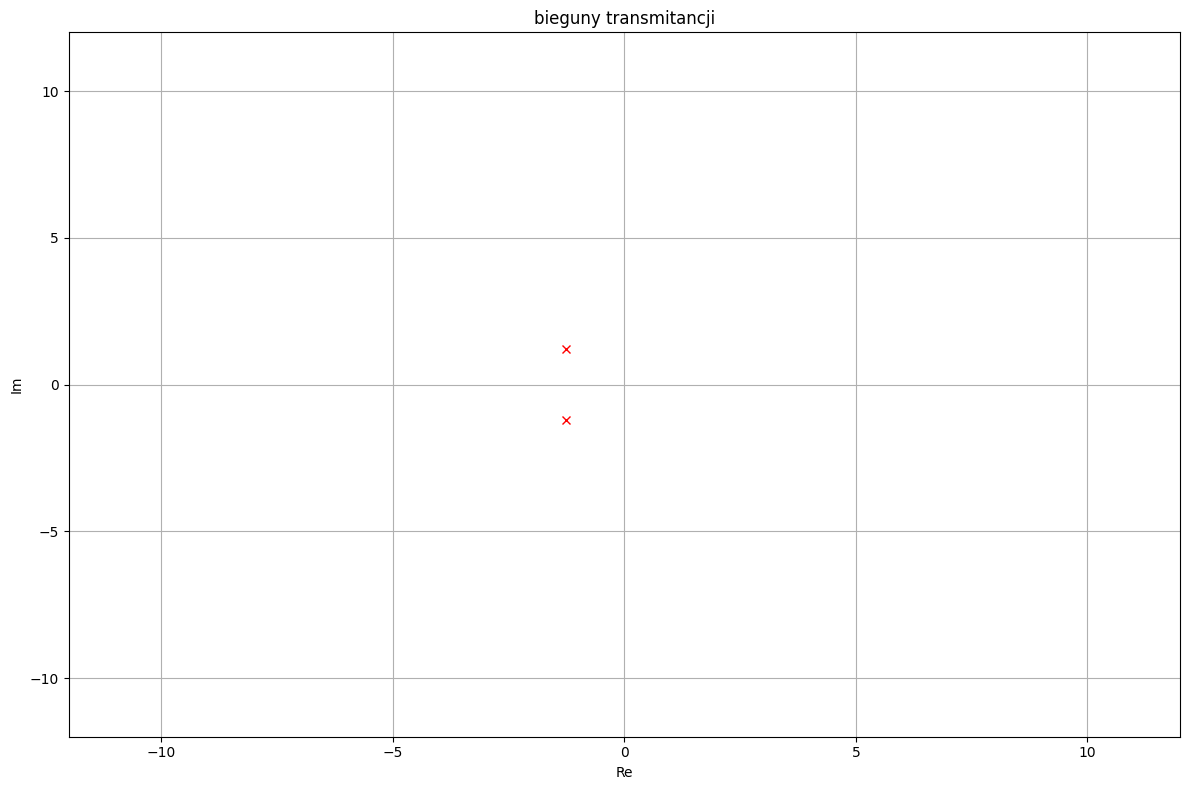

In [ ]:
B2 = np.poly1d([1, 5, 7, 2*N, 1, 0, 2])
A1 = np.poly1d([1, (0.5*N + 1), 3])

poles = np.roots(A1)

H = B(s)

fig, ax = plt.subplots(1, 1)
ax.plot(poles.real, poles.imag,'rx') 
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re") 
ax.set_ylabel("Im")
ax.set_xlim([-12, 12])
ax.set_ylim([-12, 12])
ax.grid()
fig.tight_layout()

mod = 




----
## Zadanie 3. Określanie wzorów i wartosci funkcji
----
![alt text](figures.png)


Proszę zdefiniować wzór funkcji numer `N` w odpowiednim przedziale (używając `sympy.Piecewise`), uzależniając go od zmiennej `T`.

Proszę zdefiniować wektor czasów dla danego przedziału (składający się z przynajmniej 200 elementów) oraz wyliczyć wektor próbek funkcji w tym przedziale (używając `sympy.lambdify`). Początkowo za `T` proszę przyjąć wartość 1.

Proszę wykreślić przebieg funkcji na wykresie. Proszę opisać osie wykresu.

Ostatecznie za `T` proszę podstawić sumę cyfr swojego numeru indeksu i ponownie uruchomić skrypt. Kształt przebiegu w ramach okresu nie powinien się zmienić.

function(f)


Piecewise((4*t + 2, t < -0.25), (-4*t, (t > -0.25) & (t < 0.25)), (4*t - 2, (t > 0.25) & (t < 0.5)))

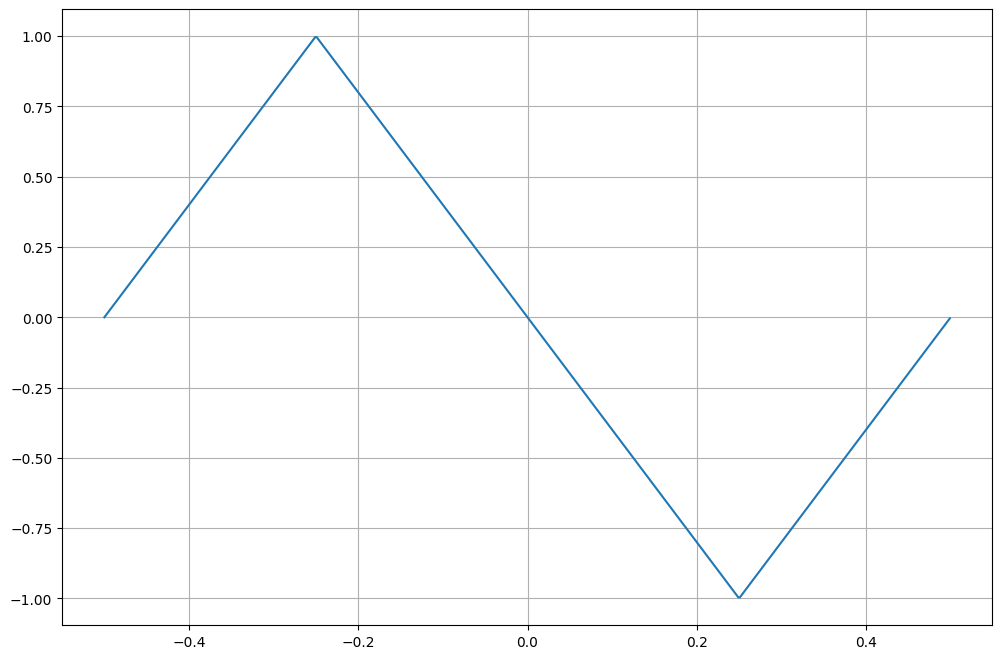

In [ ]:
t = sympy.Symbol('t', real = 'True', nonzero = 'True')

NumberOfSamples = 1001

T = 1

fN = sympy.Piecewise((4*t/T + 2, t  -T/2), (-4*t/T, (t>-T/4)&(t < T/4)), (4*t/T - 2, (t > T/4 )&(t < T/2)))

fun = sympy.lambdify(t, fN, 'numpy')
lin = np.linspace(-T/2, T/2, NumberOfSamples)
x = fun(lin)
plt.plot(lin, x)
plt.grid()

print("function(f)") 
display(fN)


----
## Zadanie 4. Wyznaczanie współczynników szeregu Fouriera (analityczne)
----

$$ f(t) = \sum_{k=-\infty}^{\infty} F_k e^{j k {{2 \pi } \over T } t} \text{   for:   } k \in \mathbb{C} $$

$$ F_0 = { 1 \over T } \int\limits_{T}f(t)dt  $$

$$ F_k = { 1 \over T } \int\limits_{T} f(t) e^{-jkt {2\pi \over T}} dt \text{   for:   } k \in \mathbb{C}, k \neq 0 $$

Dany jest jeden okres sygnału zdefiniowany jako `foo`.

Na podstawie powyższych wzorów proszę zdefiniować funkcję wyznaczającą wyrażenia na współczynniki szeregu Fouriera w postaci symbolicznej.
Podpowieź: przydatne funkcje `sympy.exp`, `sympy.simplify`, `sympy.integrate`

Wykorzystując zdefiniowaną funkcję, proszę obliczyć i wyświetlić wyrażenia na współczynniki szeregu Fouriera funkcji `foo`. Proszę zwrócić uwagę na granice całkowania.

Proszę wyznaczyć implementację numeryczną wyrażenia na współczynniki szeregu Fouriera, wyliczyć i wyświetlić wartości współczynników o indeksach od `-N-7` do `N+7` włącznie.

Proszę wyliczyć i przedstawić na wykresach prążkowych (`plt.stem`) amplitudy i fazy wyliczonych współczynników.

*Dla wybitnych:* Proszę dowolnym sposobem wyznaczyć i narysować rekonstrukcję sygnału na podstawie wyżej wyznaczonych współczynników (od `-N-7` do `N+7` włacznie)

In [26]:
t = sympy.Symbol('t', real = 'True')
k = sympy.Symbol('k', real = 'True', nonzero = True, integer=True)

foo = sympy.Piecewise((-N, (t>-1) & (t<-1/2)), (1, (t>-1/2) & (t<1/2)), (-N, (t>1/2) & (t<1)))

def wyznacz_wspolczynniki_szeregu(funkcja, początek_zakresu, koniec_zakresu):
    T = abs(początek_zakresu) + abs(koniec_zakresu)
    kernel =  sympy.exp((-sympy.I*2*k*sympy.pi*t)/T)
    F0 = 1 / T * sympy.integrate(funkcja, początek_zakresu, koniec_zakresu)
    Fk = 1 / T * sympy.integrate(funkcja * kernel, (t, początek_zakresu, koniec_zakresu))
    return F0, Fk

F0, Fk = wyznacz_wspolczynniki_szeregu(foo, -1, T)
print('F0:')
display(F0)
print('Fk:')
display(Fk)

def oblicz_wartosci_wspolczynnikow(F0, Fk, T):
    coeffF0=np.array(F0,dtype=np.cdouble)
    coeffFk=np.cdouble(sympy.lambdify(k,Fk,'numpy')(np.arange()))
    Fk_vector = np.append(coeffF0, coeffFk)
    return Fk_vector

Fk_vector = oblicz_wartosci_wspolczynnikow(F0, Fk, T)

fig, ax = plt.subplots(1, 2)
## Wykres amplitud
ax[0].stem(...)
ax[0].set_title(...)
ax[0].set_xlabel(...)
ax[0].set_ylabel(...)
## wykres faz
ax[1].stem(...)
ax[1].set_title(...)
ax[1].set_xlabel(...)
ax[1].set_ylabel(...)
fig.show()

## Rekonstrukcja (dla wybitnych):


ValueError: Invalid limits given: (-1, 1)